In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
import seaborn as sb
import random
import graphviz

import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('ggplot')


In [261]:
houses_df = pd.read_csv('train.csv', encoding='latin1')

houses_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [262]:
numeric_columns = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
 '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

numeric = houses_df[numeric_columns]
numeric

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,706,0,150,856,...,0,61,0,0,0,0,0,2,2008,208500
1,20,9600,6,8,1976,1976,978,0,284,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,60,11250,7,5,2001,2002,486,0,434,920,...,0,42,0,0,0,0,0,9,2008,223500
3,70,9550,7,5,1915,1970,216,0,540,756,...,0,35,272,0,0,0,0,2,2006,140000
4,60,14260,8,5,2000,2000,655,0,490,1145,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,0,0,953,953,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,13175,6,6,1978,1988,790,163,589,1542,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,9042,7,9,1941,2006,275,0,877,1152,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,9717,5,6,1950,1996,49,1029,0,1078,...,366,0,112,0,0,0,0,4,2010,142125


In [263]:
# Dividir el conjunto de datos en características (X) y la variable objetivo (y)
y = numeric.drop("SalePrice",  axis=1)
X = numeric

random.seed(123)

In [264]:
# Dividir los datos en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7)

In [272]:
# Crear el modelo
regressor = DecisionTreeRegressor(random_state=0)

# Entrenar el modelo
regressor.fit(X_train, y_train)

# Predecir los valores para el conjunto de prueba
y_pred = regressor.predict(X_test)

minimo = y_pred.min()
print("Valor mínimo: ", minimo)
maximo = y_pred.max()
print("Valor máximo: ", maximo)

std_dev = np.std(y_pred)
print("Desviación estándar: ", std_dev)

varianza = np.var(y_pred)
print("Varianza: ", varianza)

# Calculate MSE and RMSE
mse_test = mean_squared_error(y_test, y_pred)
print("MSE (test):", mse_test)
mae_test = mean_absolute_error(y_test, y_pred)
print("MAE (test):", mae_test)
rmse_test = np.sqrt(mse_test)
print("RMSE (test):", rmse_test)


Valor mínimo:  0.0
Valor máximo:  164660.0
Desviación estándar:  2555.525004646631
Varianza:  6530708.049374161
MSE (test): 253926.89636086897
MAE (test): 64.58793413587934
RMSE (test): 503.9115957793281


In [253]:
# Si no, se puede dividir aún más el conjunto de prueba para tener un conjunto de validación separado
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # División 80/20 entre entrenamiento y validación

# Imprimir los tamaños de los conjuntos resultantes
# print("Tamaño del conjunto de entrenamiento:", len(X_train))
# print("Tamaño del conjunto de validación:", len(X_val))
# print("Tamaño del conjunto de prueba:", len(X_test))

In [237]:
arbol1 = DecisionTreeRegressor(max_depth=4, random_state=123)
arbol1 = arbol1.fit(X_train, y_train)

In [238]:
y_pred = arbol1.predict(X_test)

In [239]:
# 64,888,781

# minino = min(y_pred)
# maximo = max(y_pred)
# print(minino)
# print(maximo)
# minino = min(y_test)
# maximo = max(y_test)
# print(minino)
# print(maximo)

mse_test = mean_squared_error(y_test, y_pred)
print("MSE (test):", mse_test)
mae_test = mean_absolute_error(y_test, y_pred)
print("MAE (test):", mae_test)
rmse_test = np.sqrt(mse_test)
print("RMSE (test):", rmse_test)

MSE (test): 142013.18248193554
MAE (test): 114.93547485718535
RMSE (test): 376.84636455979717


In [240]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, train_size=0.6)

In [241]:
arbol2 = DecisionTreeRegressor(max_depth=6, random_state=123)
arbol2 = arbol2.fit(X_train, y_train)

In [242]:
y_pred = arbol2.predict(X_test)

In [243]:
# 16,413,677

# minino = min(y_pred)
# maximo = max(y_pred)
# print(minino)
# print(maximo)
# minino = min(y_test)
# maximo = max(y_test)
# print(minino)
# print(maximo)

mse_test = mean_squared_error(y_test, y_pred)
print("MSE (test):", mse_test)
mae_test = mean_absolute_error(y_test, y_pred)
print("MAE (test):", mae_test)
rmse_test = np.sqrt(mse_test)
print("RMSE (test):", rmse_test)

MSE (test): 235879.32632888944
MAE (test): 92.51087509585453
RMSE (test): 485.6740947681783


In [244]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8)

In [245]:
arbol3 = DecisionTreeRegressor(max_depth=8, random_state=123)
arbol3 = arbol3.fit(X_train, y_train)

In [246]:
y_pred = arbol3.predict(X_test)

In [247]:
# 50,858,390

# minino = min(y_pred)
# maximo = max(y_pred)
# print(minino)
# print(maximo)
# minino = min(y_test)
# maximo = max(y_test)
# print(minino)
# print(maximo)

mse_test = mean_squared_error(y_test, y_pred)
print("MSE (test):", mse_test)
mae_test = mean_absolute_error(y_test, y_pred)
print("MAE (test):", mae_test)
rmse_test = np.sqrt(mse_test)
print("RMSE (test):", rmse_test)

MSE (test): 379075.6517622429
MAE (test): 70.27645780665974
RMSE (test): 615.6911983797096


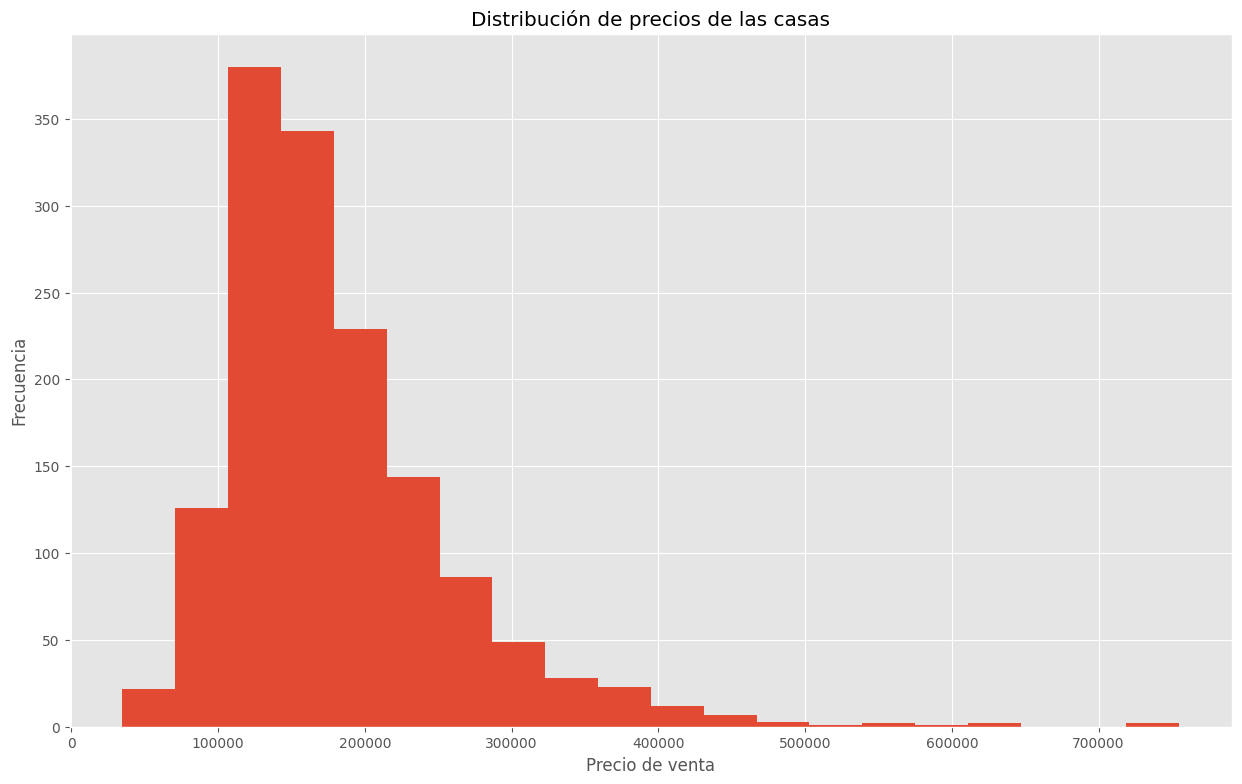

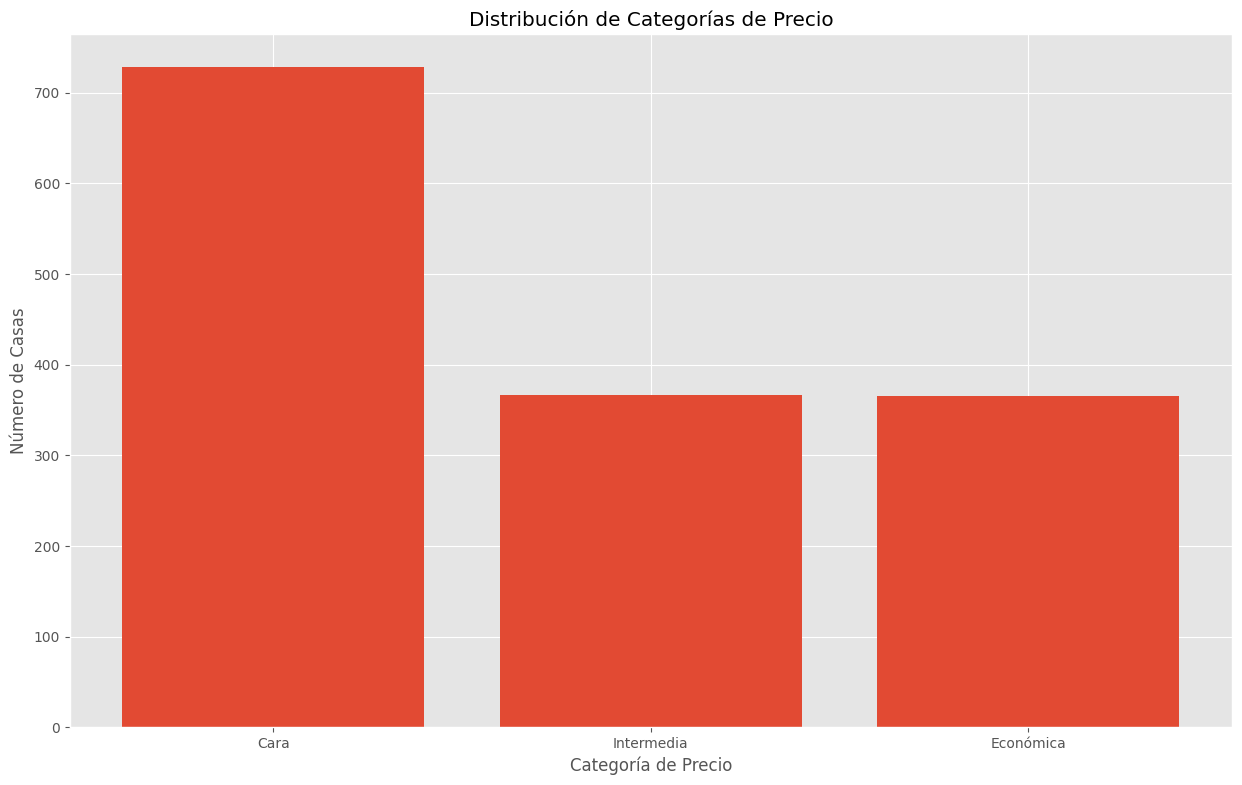

In [19]:
# Analizar la distribución de los precios de las casas
plt.hist(houses_df['SalePrice'], bins=20)
plt.xlabel('Precio de venta')
plt.ylabel('Frecuencia')
plt.title('Distribución de precios de las casas')
plt.show()

# Identificar puntos de corte significativos (ejemplo hipotético)
primer_cuartil = houses_df['SalePrice'].quantile(0.25)
segundo_cuartil = houses_df['SalePrice'].quantile(0.5)
tercer_cuartil = houses_df['SalePrice'].quantile(0.75)

# Crear la variable respuesta
def categorizar_precio(precio):
    if precio <= primer_cuartil:
        return 'Económica'
    elif precio <= segundo_cuartil:
        return 'Intermedia'
    else:
        return 'Cara'

houses_df['Precio_Categoria'] = houses_df['SalePrice'].apply(categorizar_precio)

# Verificar la distribución de las categorías
plt.bar(houses_df['Precio_Categoria'].value_counts().index, houses_df['Precio_Categoria'].value_counts().values)
plt.xlabel('Categoría de Precio')
plt.ylabel('Número de Casas')
plt.title('Distribución de Categorías de Precio')
plt.show()
